<a href="https://colab.research.google.com/github/thiruthavachelvan/stock-trend-estimation/blob/main/stock_trend_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


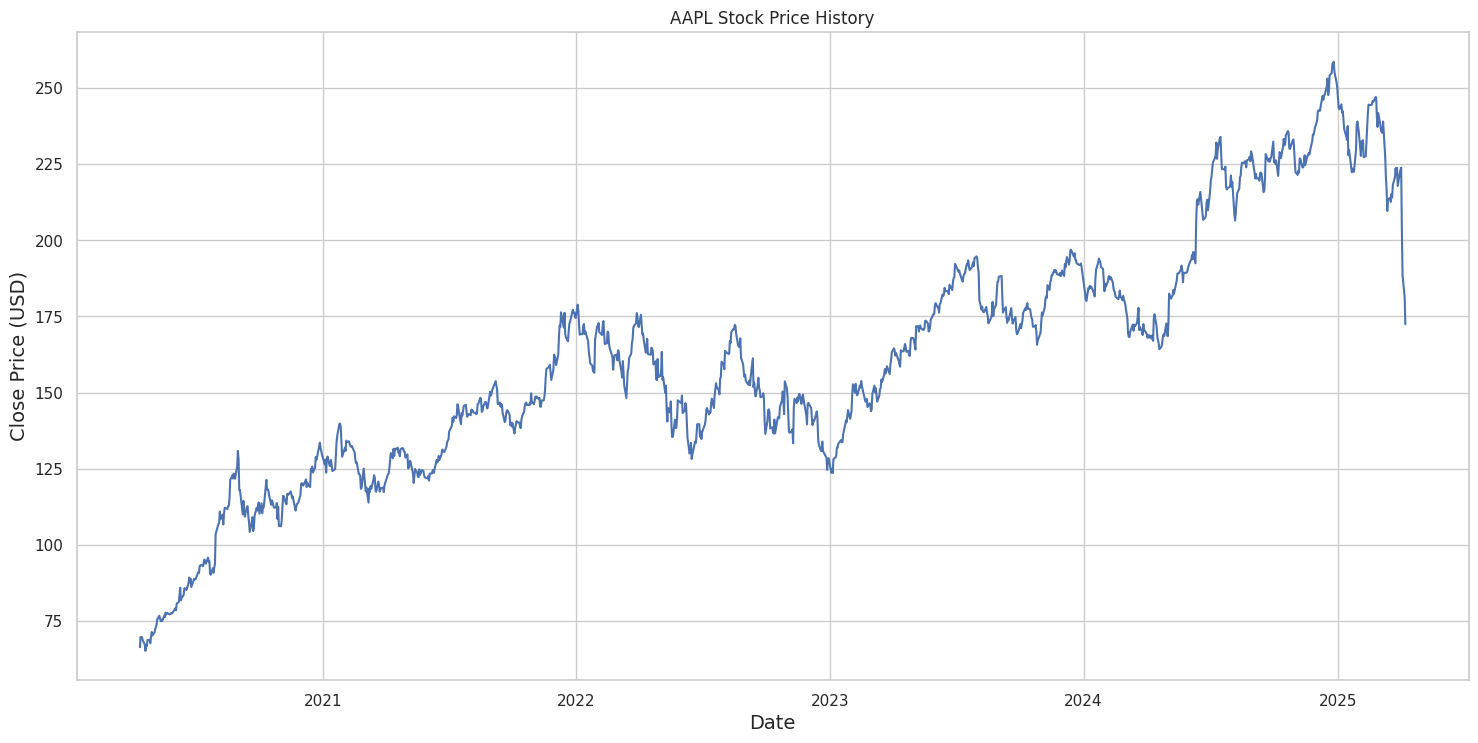

Missing values: 0
Processed data shape: (1236, 16)
Feature shape: (1176, 60, 15)
Target shape: (1176, 1)

Training and Evaluating Models

Training Linear Regression model...
--- Linear Regression Evaluation ---
Mean Squared Error: 54.1790
Root Mean Squared Error: 7.3606
Mean Absolute Error: 6.0258
R² Score: 0.8341


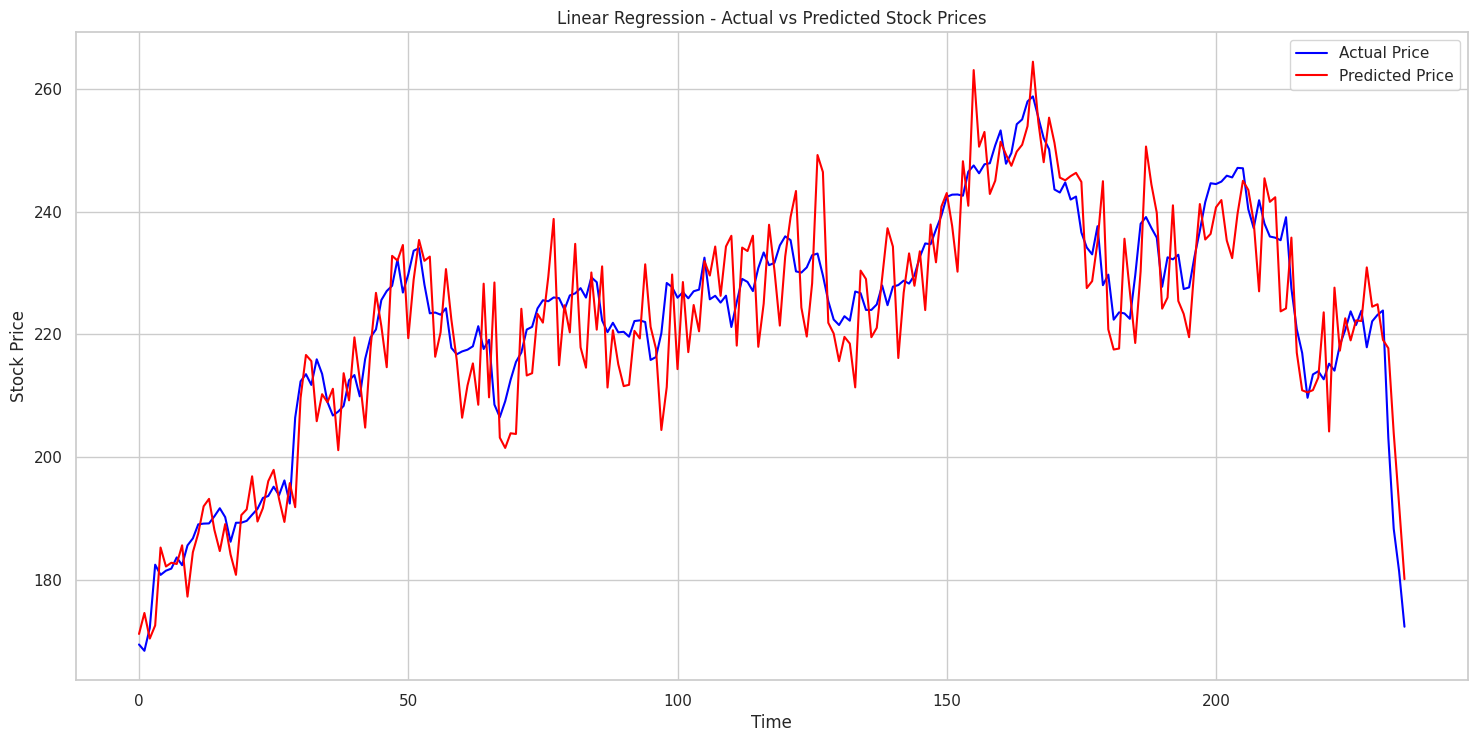


Training Random Forest model...
--- Random Forest Evaluation ---
Mean Squared Error: 1243.5900
Root Mean Squared Error: 35.2646
Mean Absolute Error: 31.5330
R² Score: -2.8076


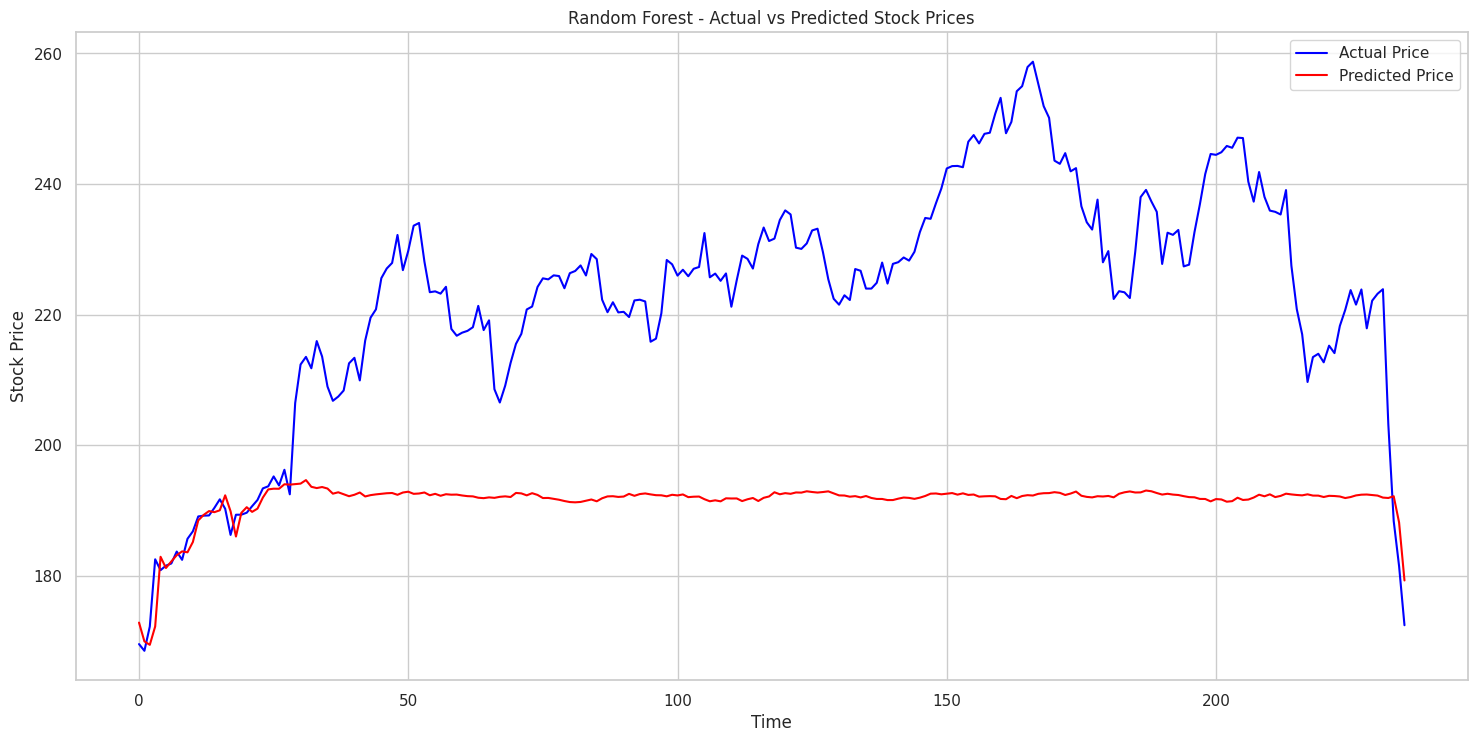


Training SVR model...
--- SVR Evaluation ---
Mean Squared Error: 4638.8207
Root Mean Squared Error: 68.1089
Mean Absolute Error: 62.4993
R² Score: -13.2032


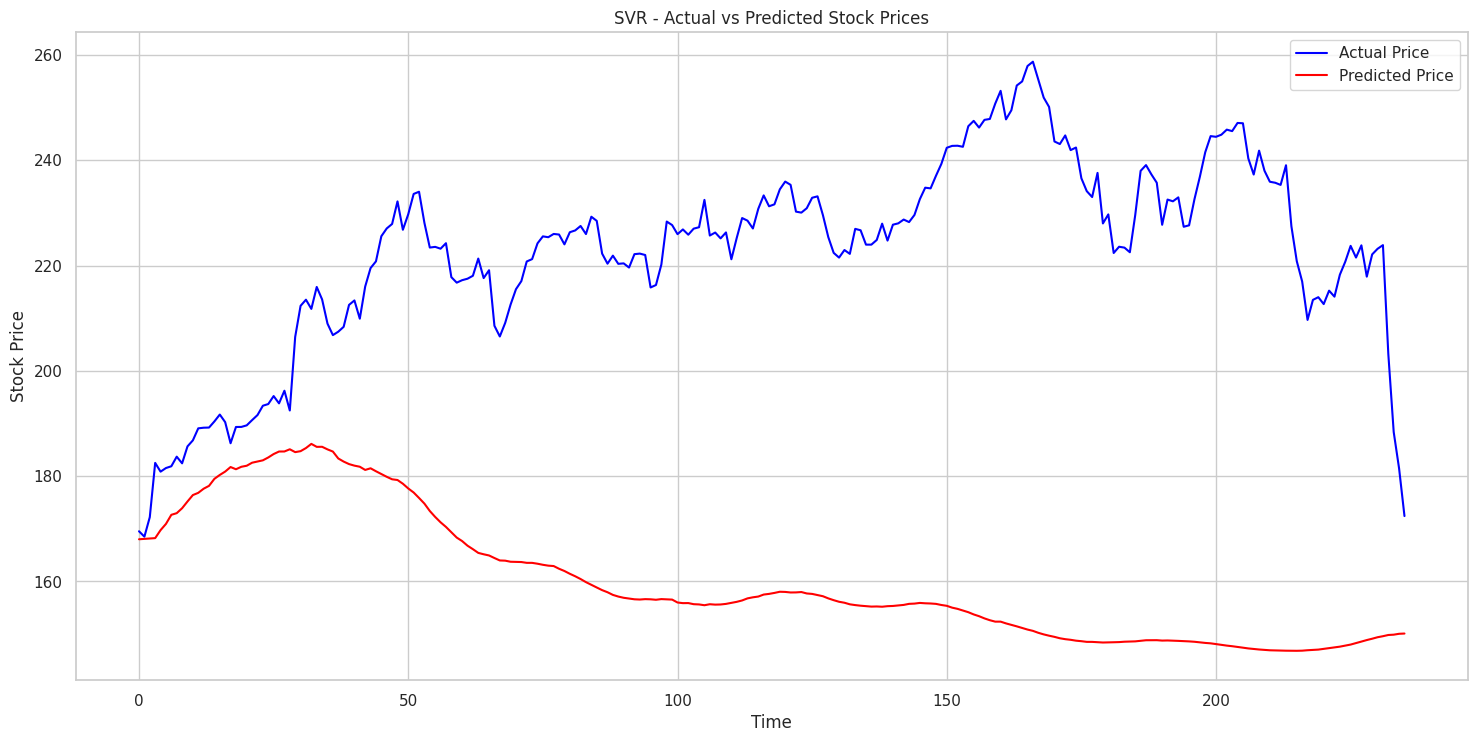


Training LSTM model...
Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0503 - val_loss: 0.0061
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0102 - val_loss: 0.0071
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0096 - val_loss: 0.0026
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━

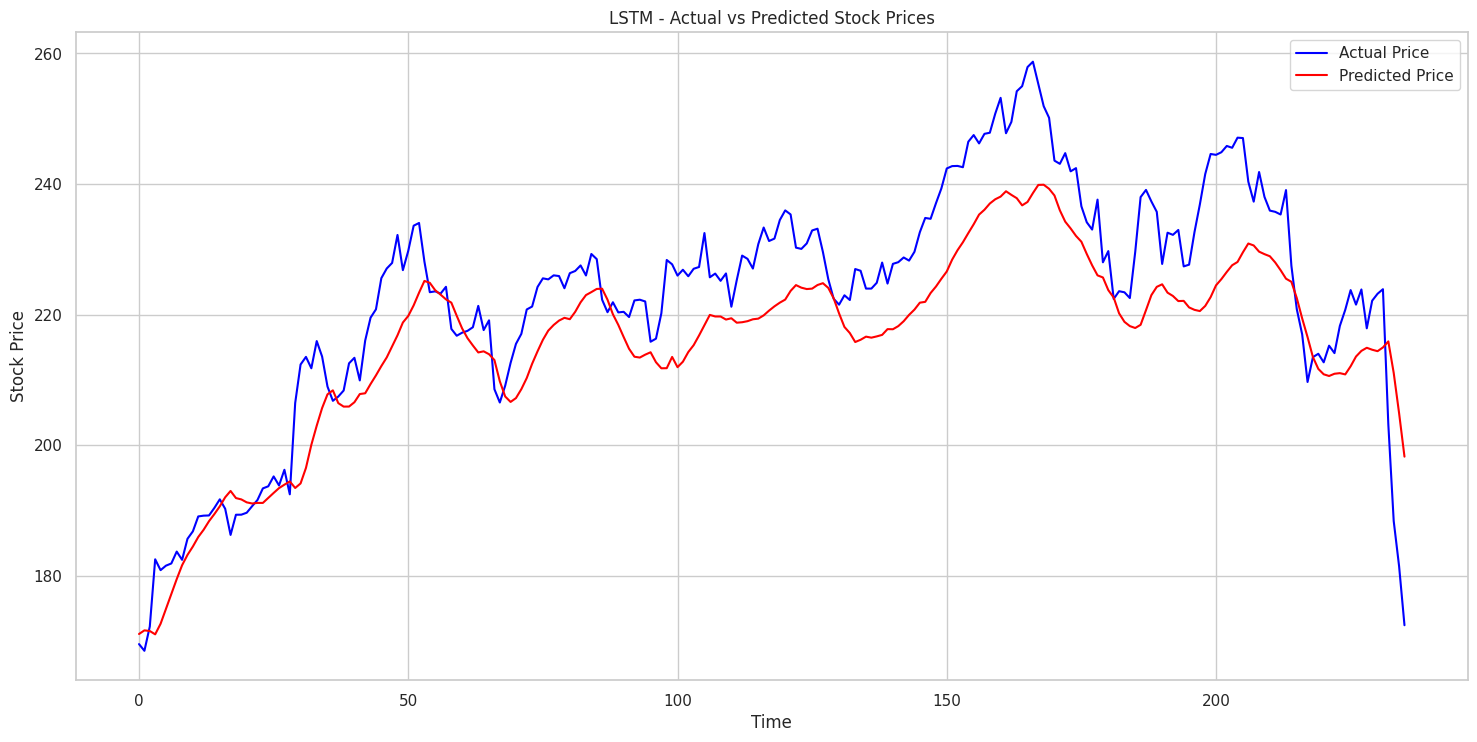

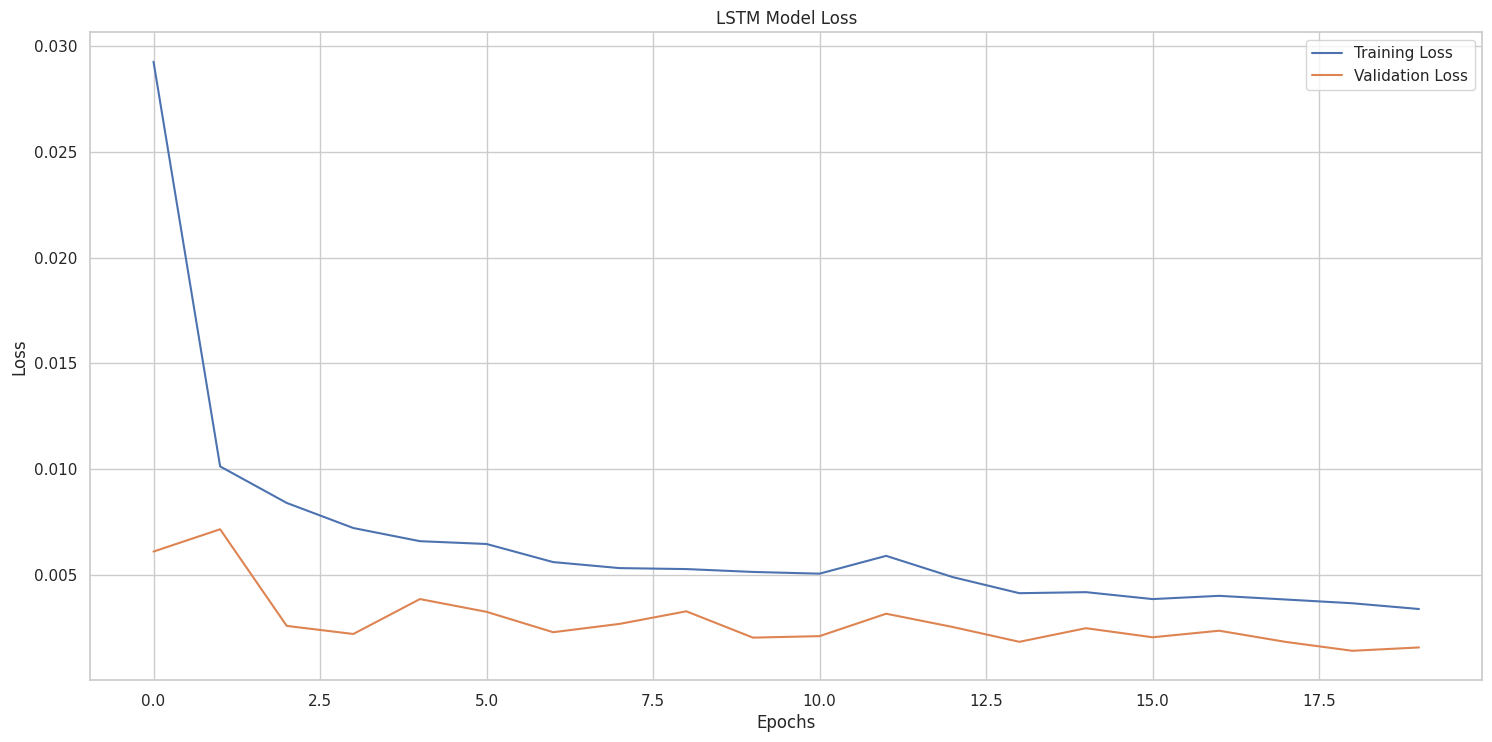


Predicting Future Stock Prices

Latest Close Price: $172.42
Predicting prices for next 5 trading days from 2025-04-09
Linear Regression predictions successful
Random Forest predictions successful
SVR predictions successful
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
LSTM predictions successful

Future Price Predictions:
            Linear Regression  Random Forest     SVR    LSTM
2025-04-09            $180.16        $179.28 $150.10 $198.24
2025-04-10            $180.16        $179.28 $150.10 $198.68
2025-04-11            $180.16        $179.28 $150.10 $198.69
2025-04-14            $180.16        $179.28 $150.10 $198.69
2025-04-15            $180.16        $179.28 $150.10 $198.69


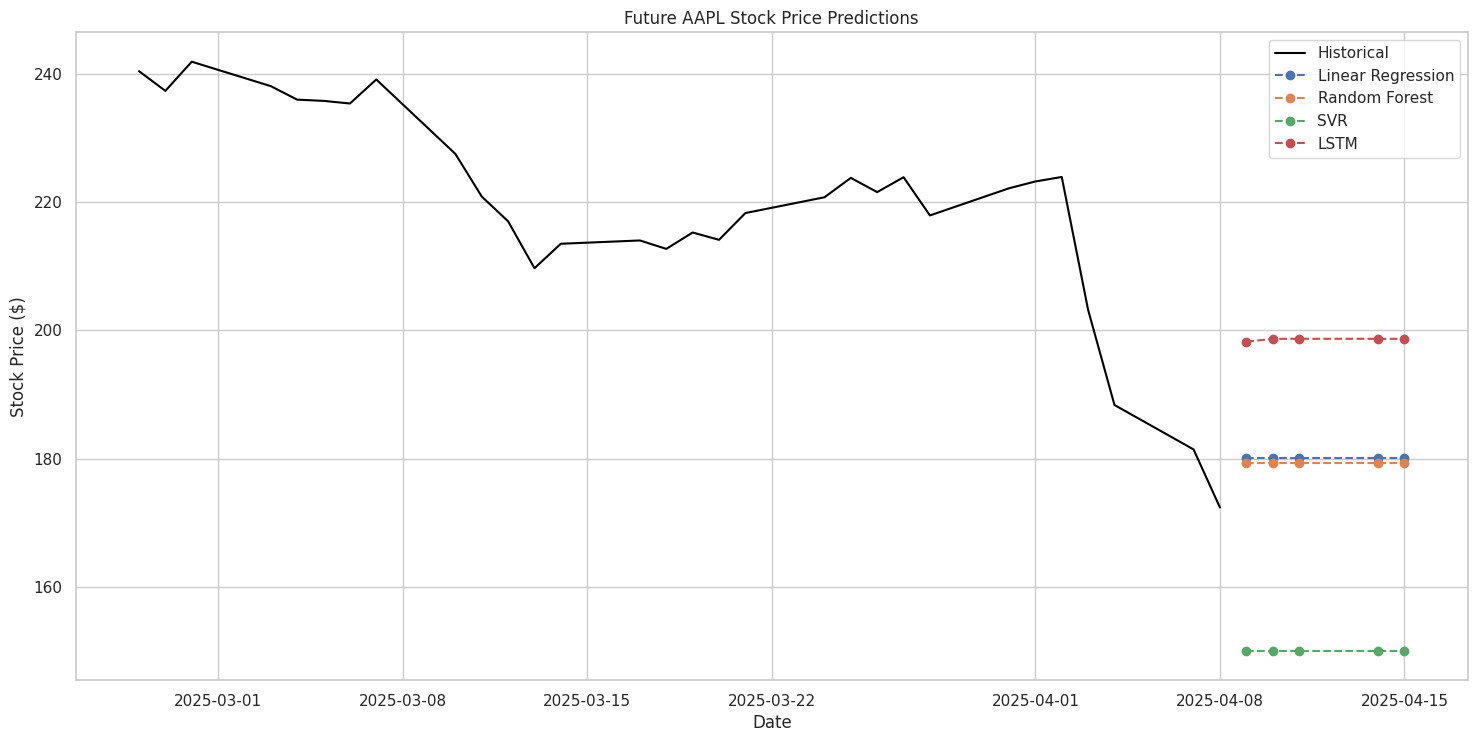


Predicted UPWARD trend with 2.69% change over the next 5 trading days.
Starting price: $172.42
Ending price (avg): $177.06


In [4]:
# Stock Trend Estimation Using Machine Learning
# ---------------------------------------------
# This notebook predicts stock price movements using machine learning techniques

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from warnings import filterwarnings
filterwarnings('ignore')

# Set plot style
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Part 1: Data Collection
# ---------------------------------------------

# Function to download stock data
def download_stock_data(ticker, start_date, end_date):
    """Download stock data for given ticker and date range"""
    print(f"Downloading data for {ticker} from {start_date} to {end_date}")
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError(f"No data found for {ticker} in the specified date range.")
    return stock_data

# Function to plot stock data
def plot_stock_data(stock_data, ticker):
    """Plot the stock price history"""
    plt.figure(figsize=(16, 8))
    plt.title(f'{ticker} Stock Price History')
    plt.plot(stock_data['Close'])
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.grid(True)
    plt.show()

# Part 2: Data Preprocessing
# ---------------------------------------------

def preprocess_data(df):
    """Preprocess the data for ML models"""
    # Check for missing values
    print("Missing values:", df.isnull().sum().sum())

    # Create feature set with technical indicators
    df_processed = df.copy()

    # Moving averages
    df_processed['MA5'] = df_processed['Close'].rolling(window=5).mean()
    df_processed['MA20'] = df_processed['Close'].rolling(window=20).mean()

    # Relative Strength Index (RSI)
    delta = df_processed['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    # Handle division by zero
    rs = np.where(loss == 0, 0, gain / loss)
    df_processed['RSI'] = 100 - (100 / (1 + rs))

    # Moving Average Convergence Divergence (MACD)
    ema12 = df_processed['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df_processed['Close'].ewm(span=26, adjust=False).mean()
    df_processed['MACD'] = ema12 - ema26
    df_processed['Signal_Line'] = df_processed['MACD'].ewm(span=9, adjust=False).mean()

    # Bollinger Bands
    df_processed['20_day_std'] = df_processed['Close'].rolling(window=20).std()
    df_processed['Upper_Band'] = df_processed['MA20'] + (df_processed['20_day_std'] * 2)
    df_processed['Lower_Band'] = df_processed['MA20'] - (df_processed['20_day_std'] * 2)

    # Calculate daily returns
    df_processed['Returns'] = df_processed['Close'].pct_change()

    # Volume features
    df_processed['Volume_Change'] = df_processed['Volume'].pct_change()
    df_processed['Volume_MA5'] = df_processed['Volume'].rolling(window=5).mean()

    # Drop NaN values
    df_processed = df_processed.dropna()

    return df_processed

def create_features_targets(df_processed, lookback=5, forecast_horizon=1):
    """Create features and targets for ML models with a specific lookback period"""
    X = []
    y = []

    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
                'RSI', 'MACD', 'Signal_Line', 'Upper_Band', 'Lower_Band',
                'Returns', 'Volume_Change', 'Volume_MA5']

    for i in range(lookback, len(df_processed) - forecast_horizon + 1):
        X.append(df_processed[features].iloc[i-lookback:i].values)
        y.append(df_processed['Close'].iloc[i+forecast_horizon-1])

    return np.array(X), np.array(y)

def scale_data(X_train, X_test, y_train, y_test):
    """Scale the data for machine learning models"""
    # Reshape data for scaling
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    # Scale features
    scaler_X = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler_X.fit_transform(X_train_2d)
    X_test_scaled = scaler_X.transform(X_test_2d)

    # Scale target
    scaler_y = MinMaxScaler(feature_range=(0, 1))
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Reshape X back to 3D for LSTM
    X_train_scaled_3d = X_train_scaled.reshape(X_train.shape)
    X_test_scaled_3d = X_test_scaled.reshape(X_test.shape)

    return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
            X_train_scaled_3d, X_test_scaled_3d, scaler_y)

# Part 3: Model Building
# ---------------------------------------------

def build_linear_regression_model(X_train, y_train):
    """Build and train a linear regression model"""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def build_random_forest_model(X_train, y_train):
    """Build and train a random forest regression model"""
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def build_svr_model(X_train, y_train):
    """Build and train an SVR model"""
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train.ravel())
    return model

def build_lstm_model(X_train, y_train, input_shape):
    """Build and train an LSTM model"""
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    return model, history

# Part 4: Model Evaluation
# ---------------------------------------------

def evaluate_model(model, X_test, y_test, scaler_y=None, model_name="Model"):
    """Evaluate model performance"""
    # Make predictions
    y_pred = model.predict(X_test)

    # If we have a scaler (for scaled data), inverse transform
    if scaler_y is not None:
        if isinstance(y_pred, np.ndarray) and y_pred.ndim == 1:
            y_pred = y_pred.reshape(-1, 1)
        y_pred = scaler_y.inverse_transform(y_pred)
        y_test = scaler_y.inverse_transform(y_test)

    # Ensure y_pred and y_test are 1D arrays for metrics calculation
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
    if y_test.ndim > 1:
        y_test = y_test.flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} Evaluation ---")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return y_pred

def plot_predictions(y_test, y_pred, model_name="Model"):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(16, 8))
    plt.title(f'{model_name} - Actual vs Predicted Stock Prices')
    plt.plot(y_test, color='blue', label='Actual Price')
    plt.plot(y_pred, color='red', label='Predicted Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_lstm_history(history):
    """Plot LSTM training history"""
    plt.figure(figsize=(16, 8))
    plt.title('LSTM Model Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Part 5: Future Prediction
# ---------------------------------------------

def predict_future_lstm(model, last_sequence, scaler_y, future_days=5):
    """Predict future stock prices using LSTM model"""
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(future_days):
        # Make prediction
        prediction = model.predict(current_sequence)

        # Inverse transform to get actual price
        prediction_value = scaler_y.inverse_transform(prediction)[0][0]
        future_predictions.append(prediction_value)

        # Update sequence for next prediction (simplified)
        # This is a basic approach and doesn't account for updating other features
        new_sequence = current_sequence.copy()
        new_sequence[0, -1, 3] = prediction[0][0]  # Update Close price at index 3
        current_sequence = new_sequence

    return future_predictions

def predict_future_ml(model, last_sequence, scaler_y, future_days=5):
    """Predict future stock prices using traditional ML models"""
    future_predictions = []

    # For traditional ML models, use a simplified approach
    # Just predict the same number of days ahead without sequence updating
    # This is not ideal but avoids complexities of feature generation

    # Ensure proper shape for prediction
    current_sequence = last_sequence.reshape(1, -1)

    # Make individual predictions
    for _ in range(future_days):
        prediction = model.predict(current_sequence)

        # Handle different output shapes
        if isinstance(prediction, np.ndarray) and prediction.ndim == 1:
            prediction = prediction.reshape(-1, 1)

        # Inverse transform
        prediction_value = scaler_y.inverse_transform(prediction)[0][0]
        future_predictions.append(prediction_value)

    return future_predictions

# Part 6: Main Function
# ---------------------------------------------

def main():
    try:
        # Download stock data
        ticker = 'AAPL'  # Example ticker (Apple Inc.)
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365*5)  # 5 years of data

        stock_data = download_stock_data(ticker, start_date, end_date)

        # Plot original data
        plot_stock_data(stock_data, ticker)

        # Preprocess data
        df_processed = preprocess_data(stock_data)
        print("Processed data shape:", df_processed.shape)

        # Check if we have enough data
        if len(df_processed) < 100:
            print("Not enough data after preprocessing. Try a different stock or date range.")
            return

        # Create features and targets
        lookback = 60  # Using 60 days of historical data for each prediction
        X, y = create_features_targets(df_processed, lookback=lookback)
        print("Feature shape:", X.shape)
        print("Target shape:", y.shape)

        # Check if we have enough sequences
        if len(X) < 10:
            print("Not enough sequences for training. Try reducing lookback period or increasing date range.")
            return

        # Split the data
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Scale the data
        (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
         X_train_scaled_3d, X_test_scaled_3d, scaler_y) = scale_data(X_train, X_test, y_train, y_test)

        # Build models
        models = {}
        predictions = {}

        print("\n" + "="*50)
        print("Training and Evaluating Models")
        print("="*50)

        # 1. Linear Regression
        try:
            print("\nTraining Linear Regression model...")
            lr_model = build_linear_regression_model(X_train_scaled, y_train_scaled)
            lr_pred = evaluate_model(lr_model, X_test_scaled, y_test_scaled, scaler_y, "Linear Regression")
            plot_predictions(y_test, lr_pred, "Linear Regression")
            models['Linear Regression'] = lr_model
            predictions['Linear Regression'] = lr_pred
        except Exception as e:
            print(f"Error with Linear Regression: {e}")

        # 2. Random Forest
        try:
            print("\nTraining Random Forest model...")
            rf_model = build_random_forest_model(X_train_scaled, y_train_scaled)
            rf_pred = evaluate_model(rf_model, X_test_scaled, y_test_scaled, scaler_y, "Random Forest")
            plot_predictions(y_test, rf_pred, "Random Forest")
            models['Random Forest'] = rf_model
            predictions['Random Forest'] = rf_pred
        except Exception as e:
            print(f"Error with Random Forest: {e}")

        # 3. SVR
        try:
            print("\nTraining SVR model...")
            svr_model = build_svr_model(X_train_scaled, y_train_scaled)
            svr_pred = evaluate_model(svr_model, X_test_scaled, y_test_scaled, scaler_y, "SVR")
            plot_predictions(y_test, svr_pred, "SVR")
            models['SVR'] = svr_model
            predictions['SVR'] = svr_pred
        except Exception as e:
            print(f"Error with SVR: {e}")

        # 4. LSTM
        try:
            print("\nTraining LSTM model...")
            input_shape = (X_train_scaled_3d.shape[1], X_train_scaled_3d.shape[2])
            lstm_model, history = build_lstm_model(X_train_scaled_3d, y_train_scaled, input_shape)
            lstm_pred = evaluate_model(lstm_model, X_test_scaled_3d, y_test_scaled, scaler_y, "LSTM")
            plot_predictions(y_test, lstm_pred, "LSTM")
            plot_lstm_history(history)
            models['LSTM'] = lstm_model
            predictions['LSTM'] = lstm_pred
        except Exception as e:
            print(f"Error with LSTM: {e}")

        # Predict future
        print("\n" + "="*50)
        print("Predicting Future Stock Prices")
        print("="*50)

        # Create future dates (business days)
        future_dates = pd.date_range(
            start=pd.to_datetime(df_processed.index[-1]) + pd.Timedelta(days=1),
            periods=5,
            freq='B'
        )

        # Initialize DataFrame for future predictions
        future_df = pd.DataFrame(index=future_dates)

        # Get the latest close price for reference
        if len(df_processed) > 0:
            # Fix: Extract the last close price as a float value
            last_close = float(df_processed['Close'].iloc[-1])
            print(f"\nLatest Close Price: ${last_close:.2f}")
            print(f"Predicting prices for next 5 trading days from {future_dates[0].strftime('%Y-%m-%d')}")

        # Get future predictions from each model
        for model_name, model in models.items():
            try:
                if model_name == 'LSTM':
                    # For LSTM model
                    last_sequence_3d = X_test_scaled_3d[-1:] if len(X_test_scaled_3d) > 0 else X_train_scaled_3d[-1:]
                    future_preds = predict_future_lstm(model, last_sequence_3d, scaler_y, 5)
                else:
                    # For traditional ML models
                    last_sequence = X_test_scaled[-1] if len(X_test_scaled) > 0 else X_train_scaled[-1]
                    future_preds = predict_future_ml(model, last_sequence, scaler_y, 5)

                future_df[model_name] = future_preds
                print(f"{model_name} predictions successful")
            except Exception as e:
                print(f"Error predicting with {model_name}: {e}")

        # Display predictions
        if not future_df.empty:
            # Format the output with dollar signs
            print("\nFuture Price Predictions:")
            # Fix: Use a formatter function instead of pandas option
            with pd.option_context('display.float_format', '${:.2f}'.format):
                print(future_df)

            # Plot future predictions
            plt.figure(figsize=(16, 8))
            plt.title(f'Future {ticker} Stock Price Predictions')

            # Plot historical data for context (last 30 days)
            if len(df_processed) >= 30:
                historical_dates = df_processed.index[-30:]
                historical_prices = df_processed['Close'][-30:]
                plt.plot(historical_dates, historical_prices, color='black', label='Historical')

            # Plot predictions
            for column in future_df.columns:
                plt.plot(future_df.index, future_df[column], marker='o', linestyle='--', label=column)

            plt.xlabel('Date')
            plt.ylabel('Stock Price ($)')
            plt.legend()
            plt.grid(True)
            plt.show()

            # Calculate average prediction and trend
            if len(future_df.columns) > 0:
                future_df['Average'] = future_df.mean(axis=1)
                if len(df_processed) > 0:
                    # Fix: Extract values as floats
                    initial_price = float(df_processed['Close'].iloc[-1])
                    final_avg_pred = float(future_df['Average'].iloc[-1])

                    if final_avg_pred > initial_price:
                        trend = "UPWARD"
                        pct_change = (final_avg_pred - initial_price) / initial_price * 100
                    else:
                        trend = "DOWNWARD"
                        pct_change = (initial_price - final_avg_pred) / initial_price * 100

                    print(f"\nPredicted {trend} trend with {pct_change:.2f}% change over the next 5 trading days.")
                    print(f"Starting price: ${initial_price:.2f}")
                    print(f"Ending price (avg): ${final_avg_pred:.2f}")
        else:
            print("No future predictions were generated. Please check the error messages above.")

    except Exception as e:
        import traceback
        print(f"An error occurred: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()